In [19]:
import sys
from IPython.display import Image, display
import sympy

sys.path.append('..')   # path for local package
import restflow
from restflow import symvec

v = restflow.Vertex

# Example 1: Burgers-KPZ equation

The KPZ equation is given by:
\begin{equation*}
\partial_t\phi = \kappa \nabla^2\phi + \frac{\lambda}{2} |\nabla\phi|^2  + \eta
\end{equation*}
By switching to Fourier space, the only non-zero vertex is:
\begin{equation*}
\cal{v}_2(\bold{k_1}, \bold{k_2}) = - \frac{\lambda}{2} \bold{k_1} \cdot \bold{k_2}
\end{equation*}
The only one-loop graph correcting the propagator for this case is:

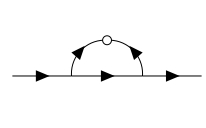

In [20]:
pil_img = Image(filename='./figures/kpz_graph.jpg')
display(pil_img)

<b><ins>1st Step:</b></ins> Define the model parameters, the vectors, the propagators and the vertex functions:

In [21]:
# parameters of model
lam, kap, D = sympy.symbols('lambda kappa D')
alpha, a = 0, 0
# dimension and reduced surface area
d, Kd = sympy.symbols('d K_d')
# symbols for vectors
_q, _k, dot_kq = sympy.symbols('q k (k·q)')

# assign symbol for dot product
symvec.dots[frozenset((_q,_k))] = dot_kq
# create vectors
k = symvec.Vector(_k)
q = symvec.Vector(_q)
def f(x, alpha, a):
    return (kap*x**2+a)*x**alpha

# vertex functions v2(k1,k2|k)
# def v2(k1,k2,k):
#     return -lam/2*k1*k2
def v2(k1,k2,k):
    return (-lam*k1*k2,2)


<b><ins>2nd Step:</b></ins> Create the graph using the `graph.py` script. Visualizes it using `plot_graph` and creates LaTeX file using `latex_graph`:

In [22]:
v = [restflow.Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[1].link_vertex(v[2])
v[1].add_outgoing()
g = restflow.Graph(v)
g.plot_graph()
g.latex_graph('graph_plot')

AttributeError: module 'restflow' has no attribute 'Vertex'

<b><ins>3rd Step:</b></ins> Label the external lines using `label_edges` and we express the integrands `integral`. We also change coordinates $\mathbf{k} \rightarrow \mathbf{k}+\mathbf{q}/2$ :

In [ ]:
g.label_edges(q,[q],.5*q+k)
I = g.integral(f, D, .5*q+k, alpha, a, v2, v3=0)
display(I[0]/I[1])


<b><ins>4th Step:</b></ins> Calculate the angular integral using `integrate2` and integrate over the magnitude of the wavevector using `integrate_magnitude`:

In [ ]:
I = symvec.integrate2(I, k, q, d, n=3)
display(I)
I = symvec.integrate_magnitude(I, k, d)
display(I)

This integral corrects the model parameter $\kappa$. Performing the wavector integral and renormalizing it, we get:

\begin{equation*}
\psi_\kappa = \frac{D\lambda^2 K_d \Lambda^{d-2}}{\kappa^3} \frac{2-d}{4d}
\end{equation*}

# Example 2: Graph with 2 external legs

Assume we want to calculate contribution to correction of $\lambda$ of the following graph (figure (a)) for the KPZ. 

This graph represents 2 graphs (figure (b) and (c)):

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='./figures/2legs_example.jpg')
display(pil_img)

Use the same system with before but we need to define the vector $p$ and the corresponding dot products:

In [ ]:
_p, dot_pk, dot_qp = sympy.symbols('p (k·p) (q·p)')
symvec.dots[frozenset((_q,_p))] = dot_qp
symvec.dots[frozenset((_p,_k))] = dot_pk
p = symvec.Vector(_p)

Create the graph:

In [ ]:
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[2].add_outgoing()
v[3].add_outgoing()
g = Graph(v)
g.plot_graph()

Use the function `integrals_symmet` to calculate all the permutations of the external momenta (figure (b) and (c)):

In [ ]:
I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a, v2, v3=0)

The integrands of the two figures are:

In [ ]:
display(I_array[0][0]/I_array[0][1])
display(I_array[1][0]/I_array[1][1])

Use the function `solve_integrals_symmet` to calculate the angular integrals and sum the two graphs:

In [ ]:
I = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
display(I)